<a href="https://colab.research.google.com/github/Jandhayalasaikiran/codespaces-jupyter/blob/main/Health_insurance_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)

In [2]:
df = pd.read_csv('/content/HEALTH INSURANCE.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [3]:
# print size of data set
df.shape

(50882, 14)

In [4]:
# check number of unique values from the all the objectdata types
df.select_dtypes(include='object').nunique()


City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [5]:
# create a dictionary of replacement values for explotary data analysis
replace_dict = {0:'no',1:'yes'}
# replace the values in the response dictionary
df['Response']=df['Response'].replace(replace_dict)
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,no
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,no
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,yes
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,no
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,no


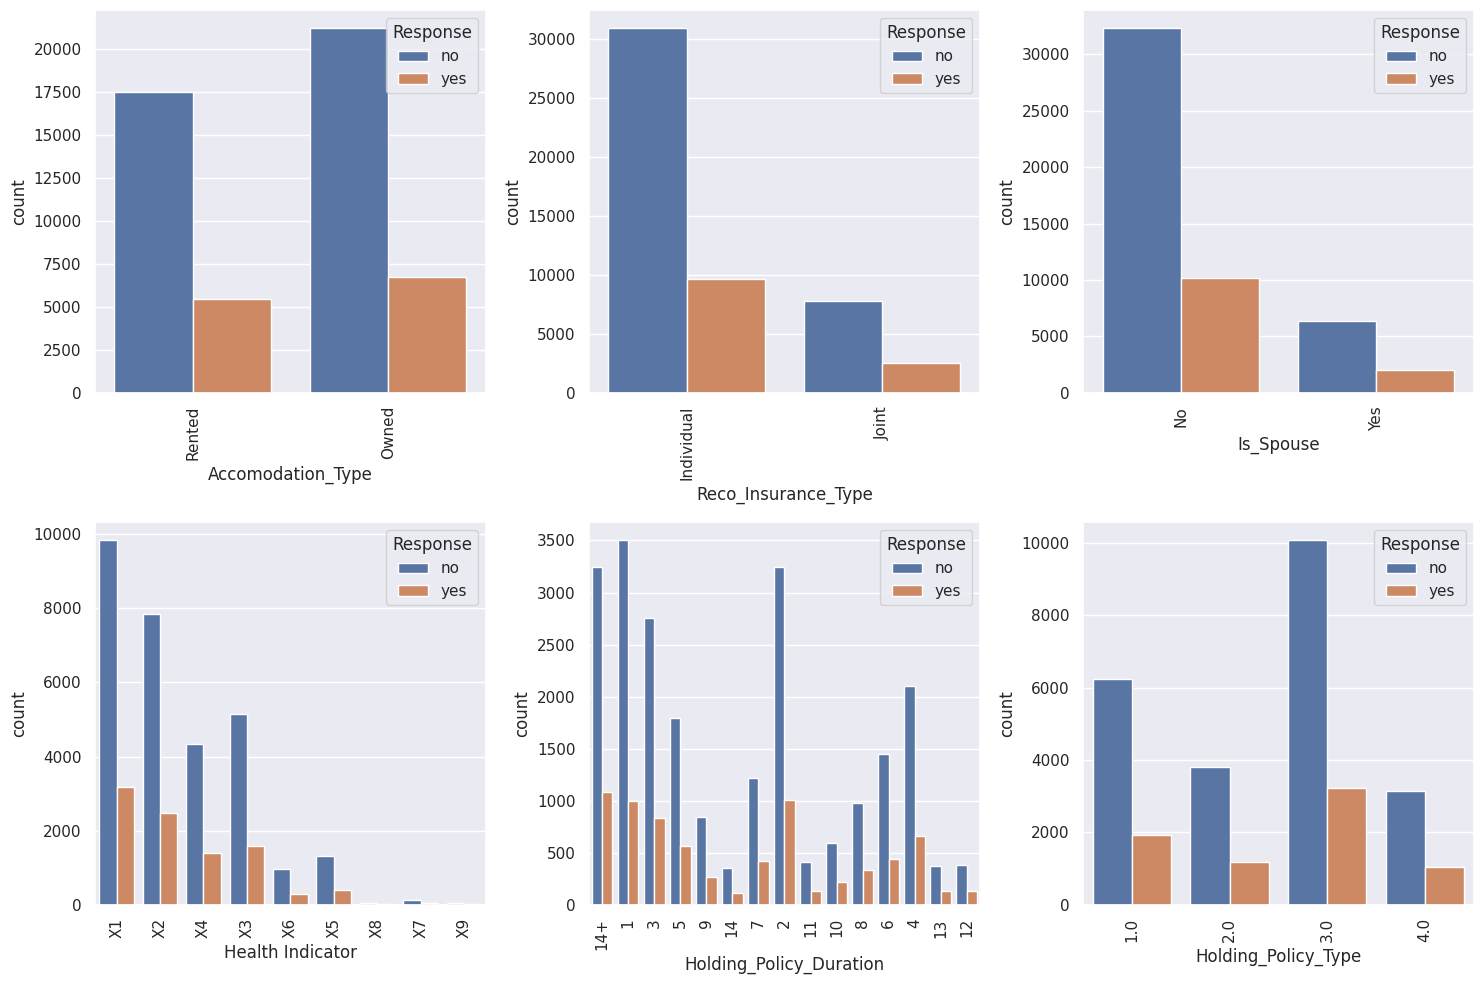

In [6]:
# list of categorical variables to plot
cat_vars =['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']

#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axs = axs.flatten()

#create a bar plot for each categorical variable
for i, var in enumerate(cat_vars):
  sns.countplot(x=var, hue='Response',data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
# adjusting space between two subplots
fig.tight_layout()

# show plot
plt.show()


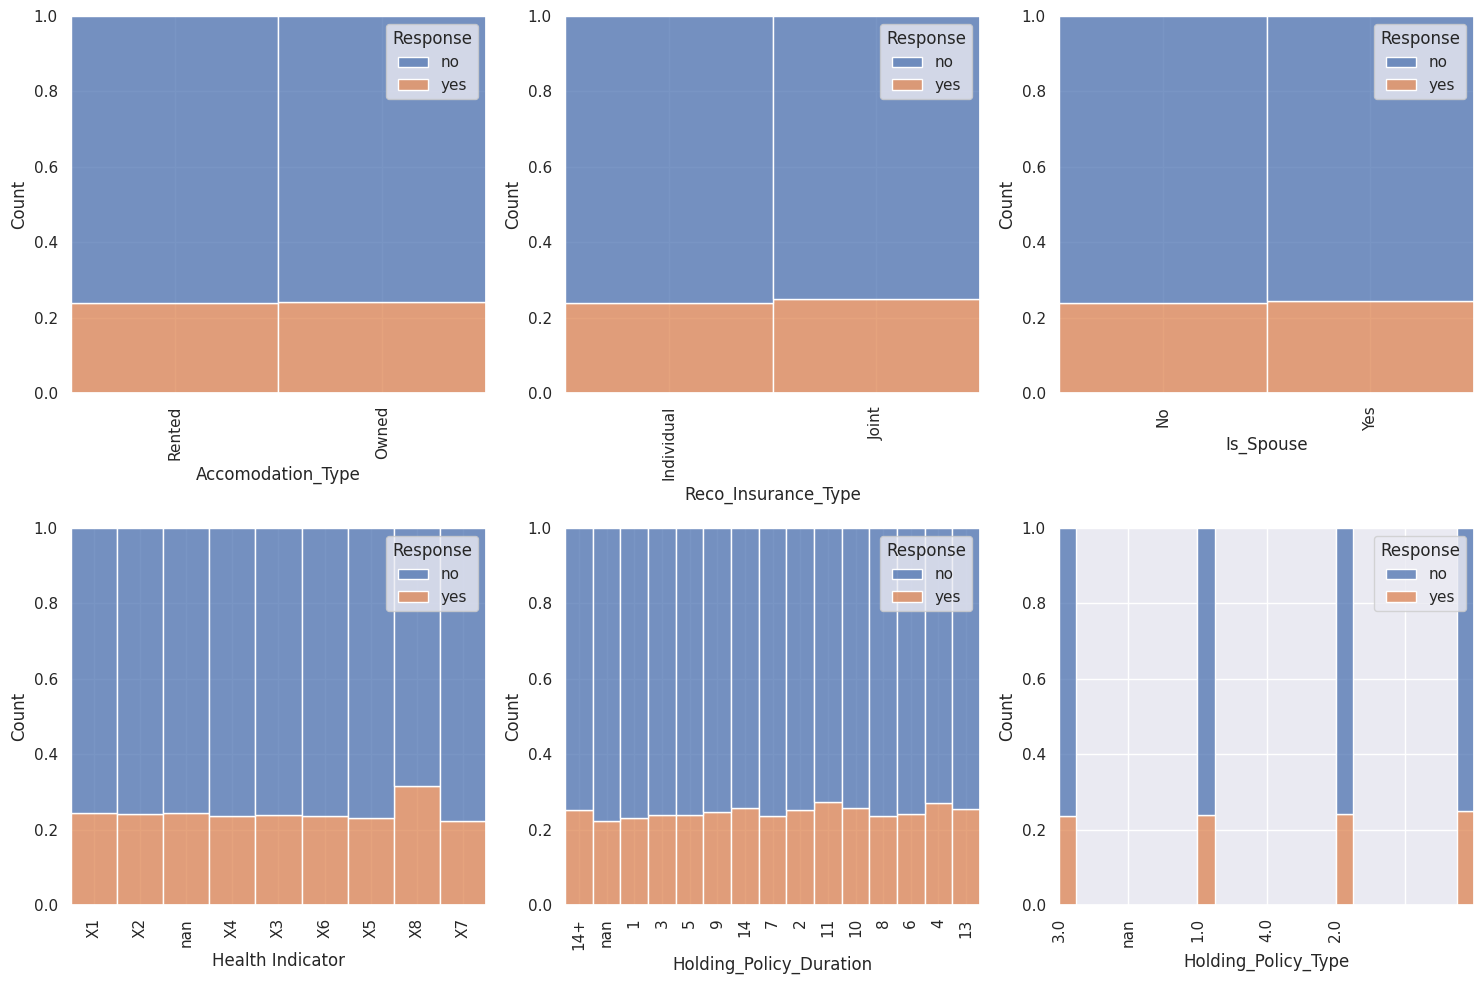

In [7]:
import warnings
warnings.filterwarnings("ignore")

# list of categorical variables to plot
cat_vars =['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']

#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axs = axs.flatten()

#create a bar plot for each categorical variable
for i, var in enumerate(cat_vars):
  sns.histplot(x=var, hue='Response',data=df, ax=axs[i], multiple='fill', kde=False)
  axs[i].set_xticklabels(df[var].unique(),rotation=90)
# adjusting space between two subplots
fig.tight_layout()

# show plot
plt.show()

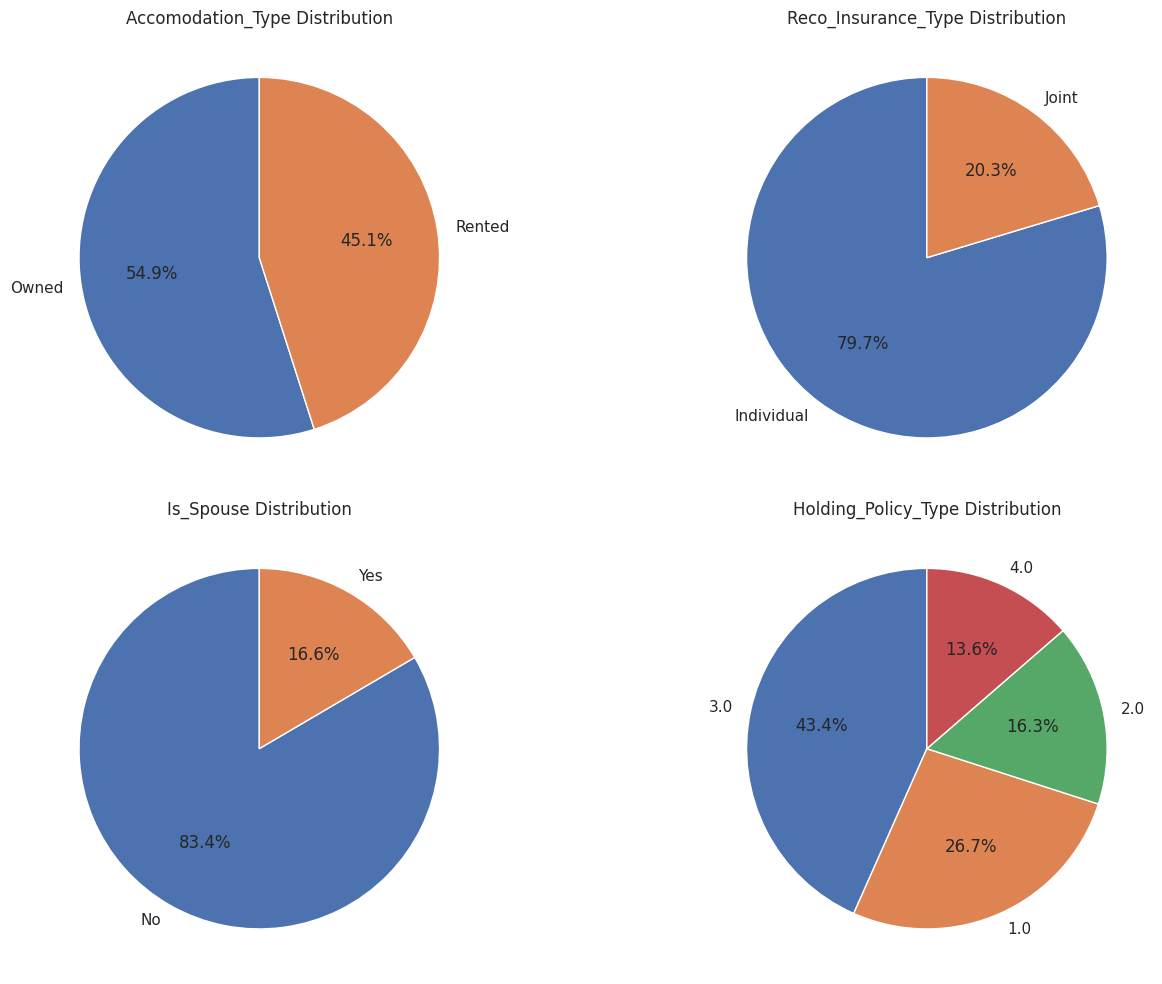

In [8]:
# list of categorical variables to plot
cat_vars =['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Holding_Policy_Type']

#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axs = axs.flatten()

#create pie chart
for i,  var in enumerate(cat_vars):
  if i < len(axs.flat):
    # count no of occurences in each category
    cat_counts = df[var].value_counts()

    #create pie chart
    axs.flat[i].pie(cat_counts,labels=cat_counts.index, autopct='%1.1f%%',startangle=90)


    axs.flat[i].set_title(f'{var} Distribution')
# adjusting space between two subplots
fig.tight_layout()

# show plot
plt.show()

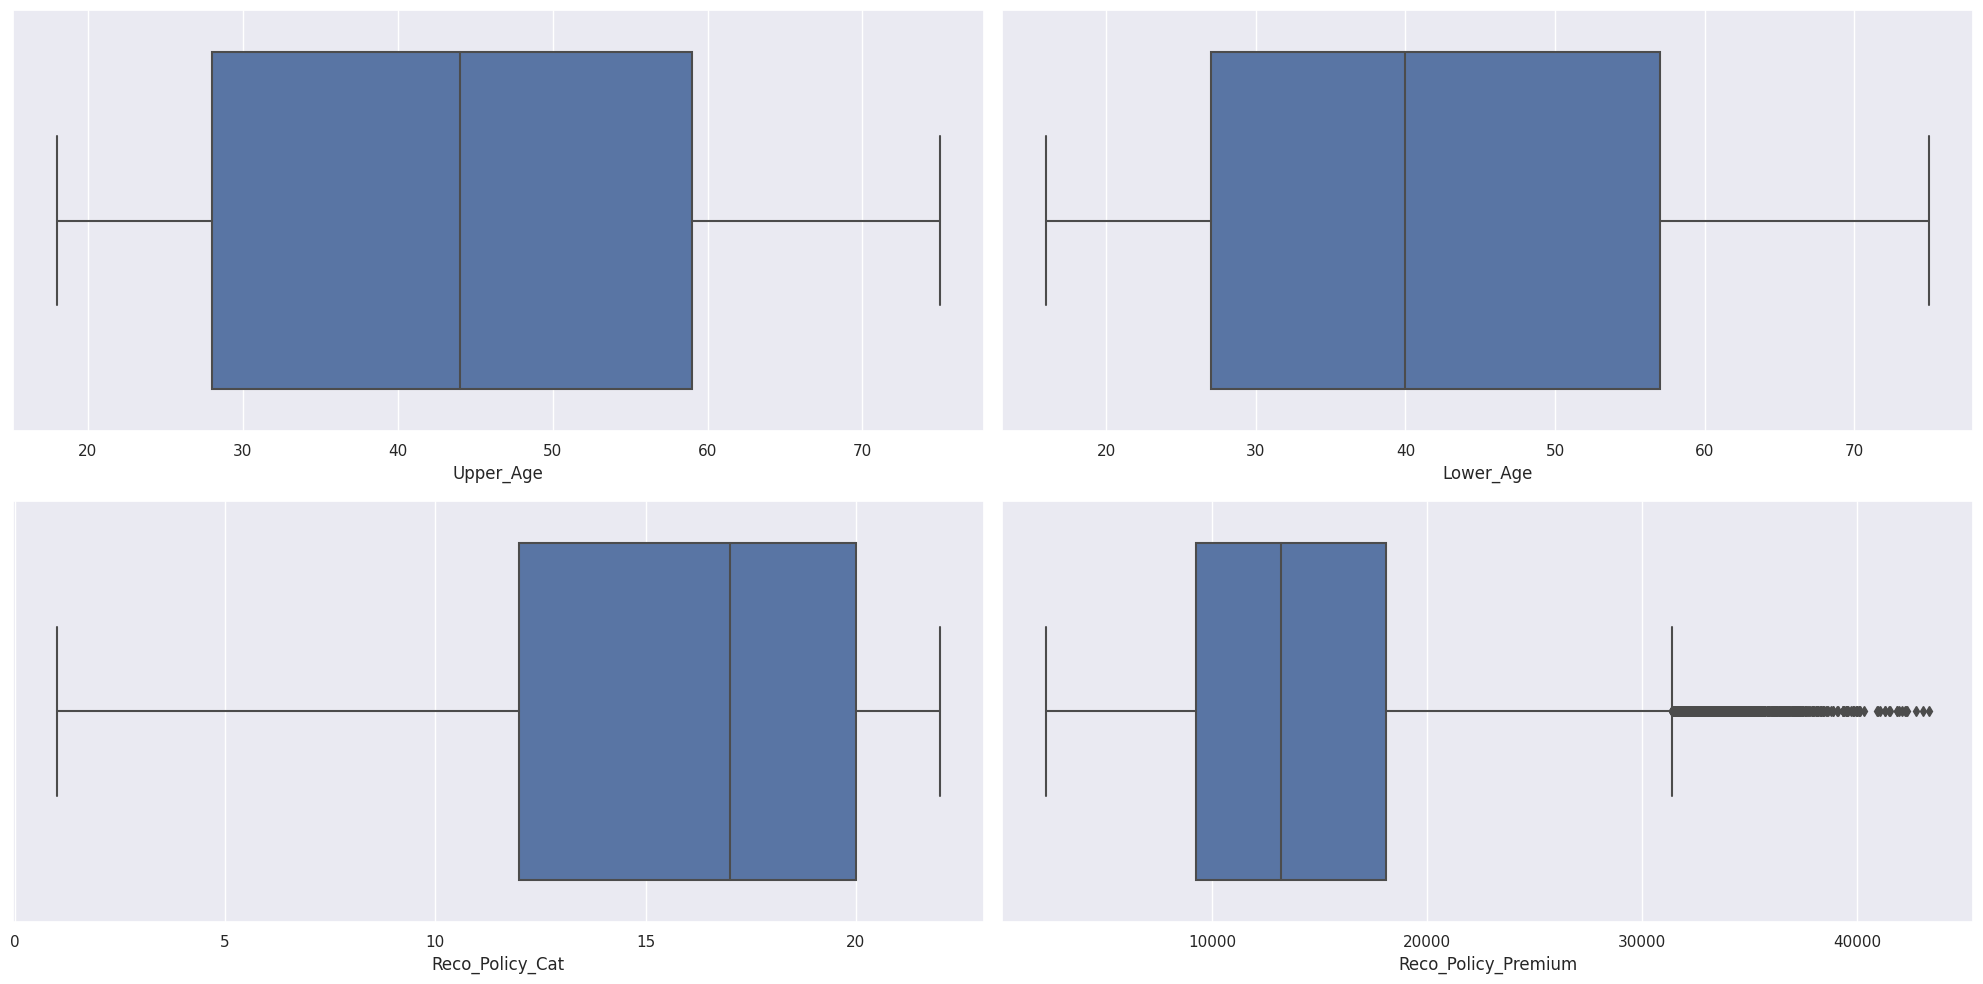

In [9]:
num_vars = ['Upper_Age','Lower_Age','Reco_Policy_Cat', 'Reco_Policy_Premium']
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axs=axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var,data=df, ax =axs[i])
fig.tight_layout()

plt.show()

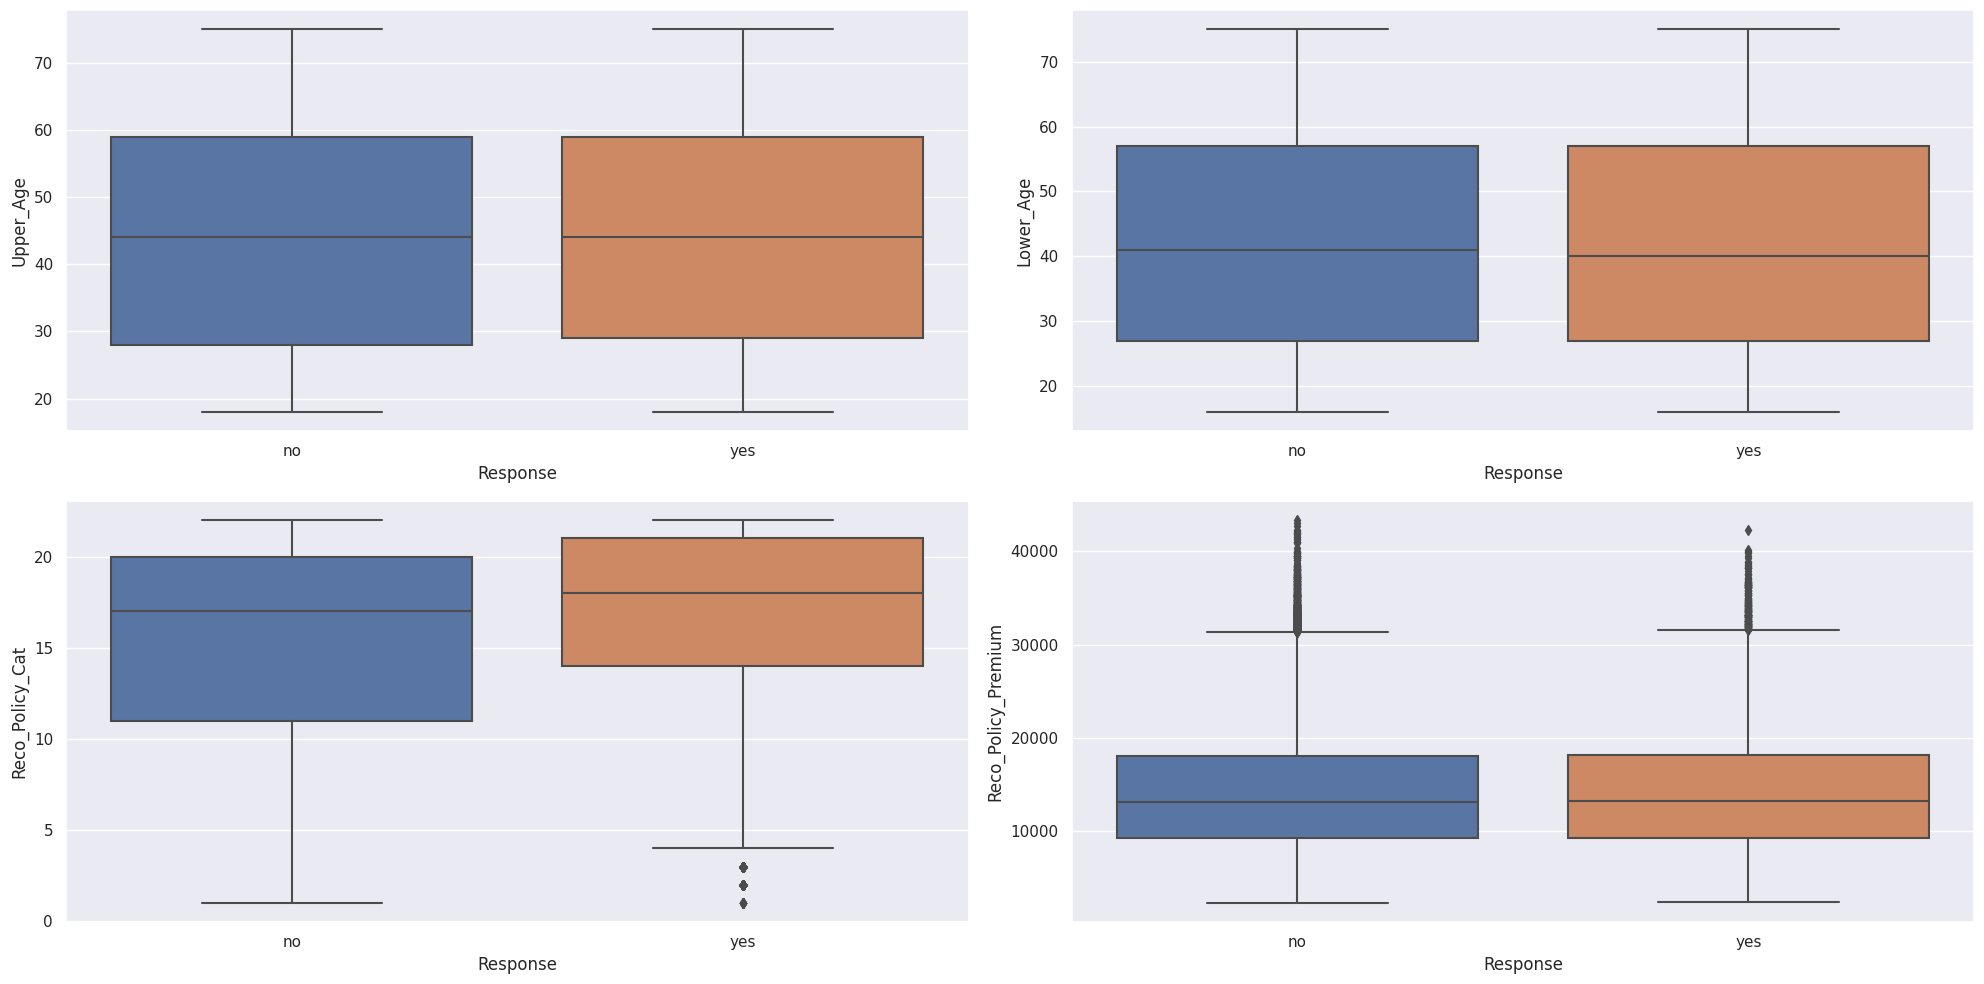

In [10]:
num_vars = ['Upper_Age','Lower_Age','Reco_Policy_Cat', 'Reco_Policy_Premium']
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axs=axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(y=var, x='Response', data=df, ax =axs[i])
fig.tight_layout()

plt.show()

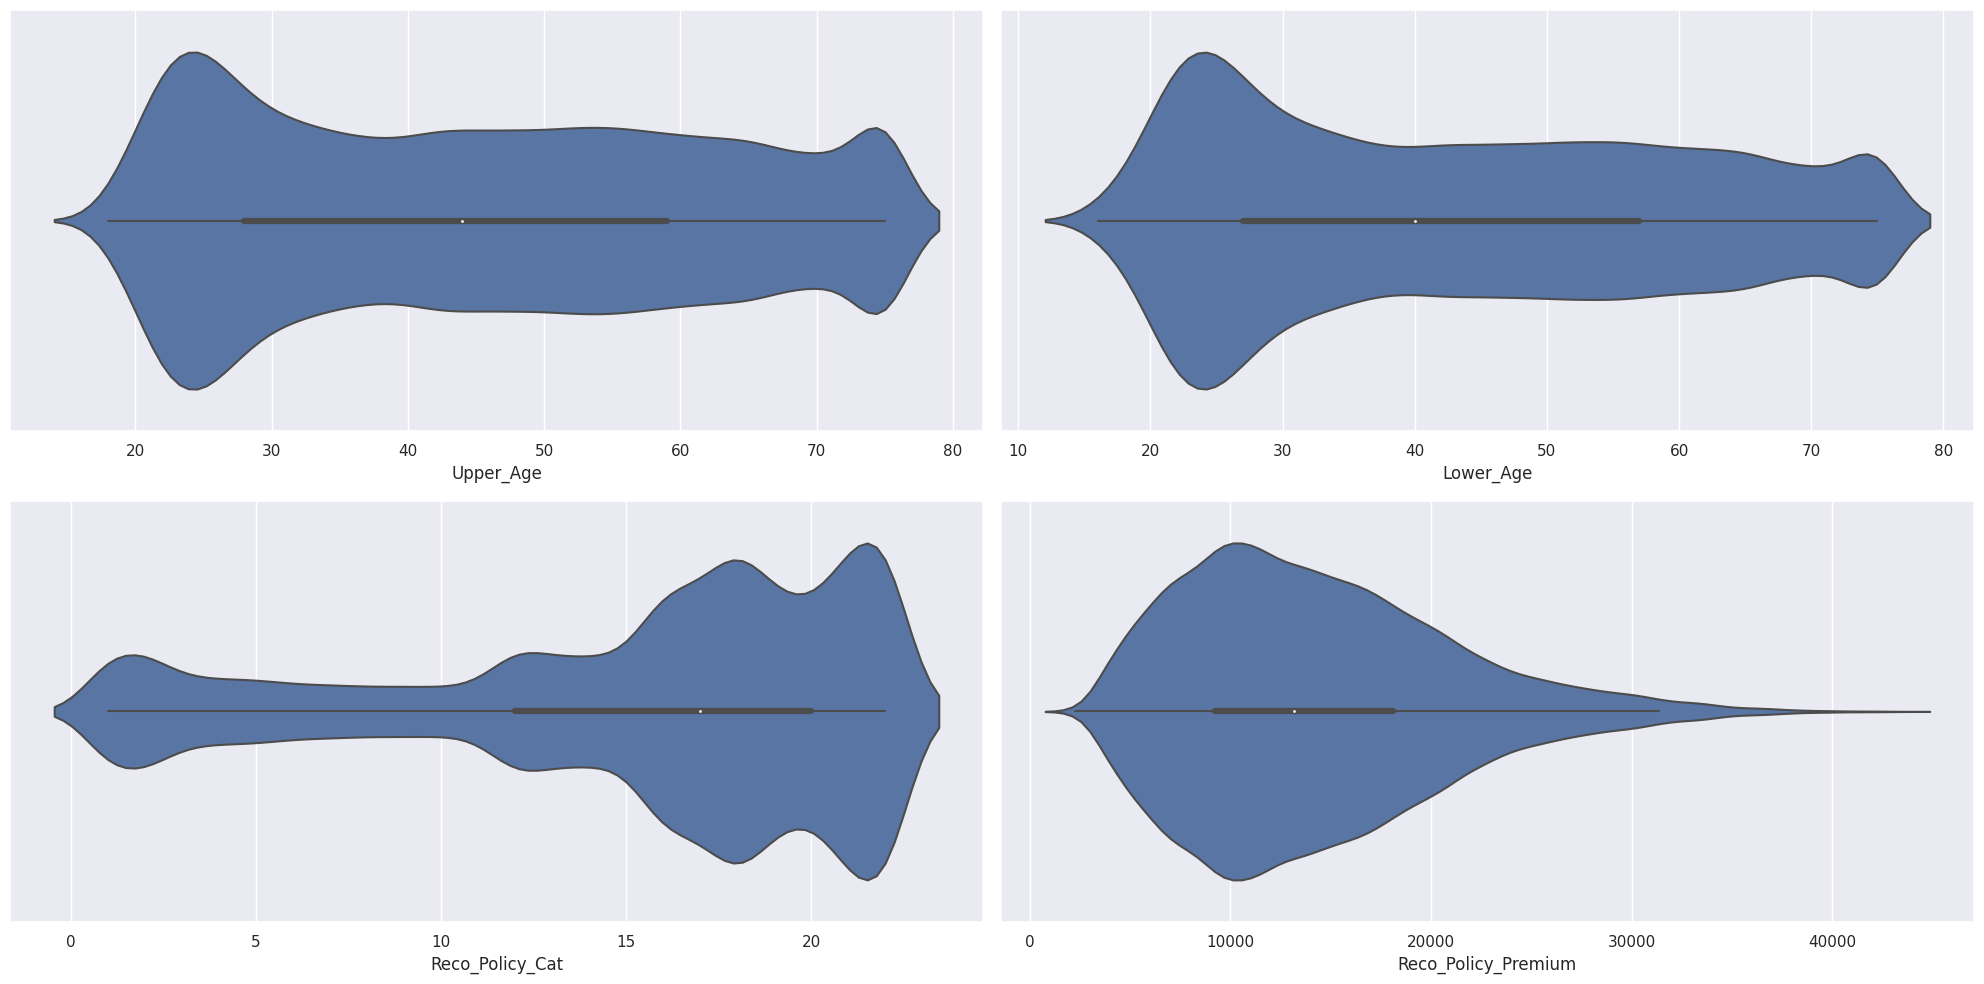

In [11]:
num_vars = ['Upper_Age','Lower_Age','Reco_Policy_Cat', 'Reco_Policy_Premium']
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axs=axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data=df, ax =axs[i])
fig.tight_layout()

plt.show()

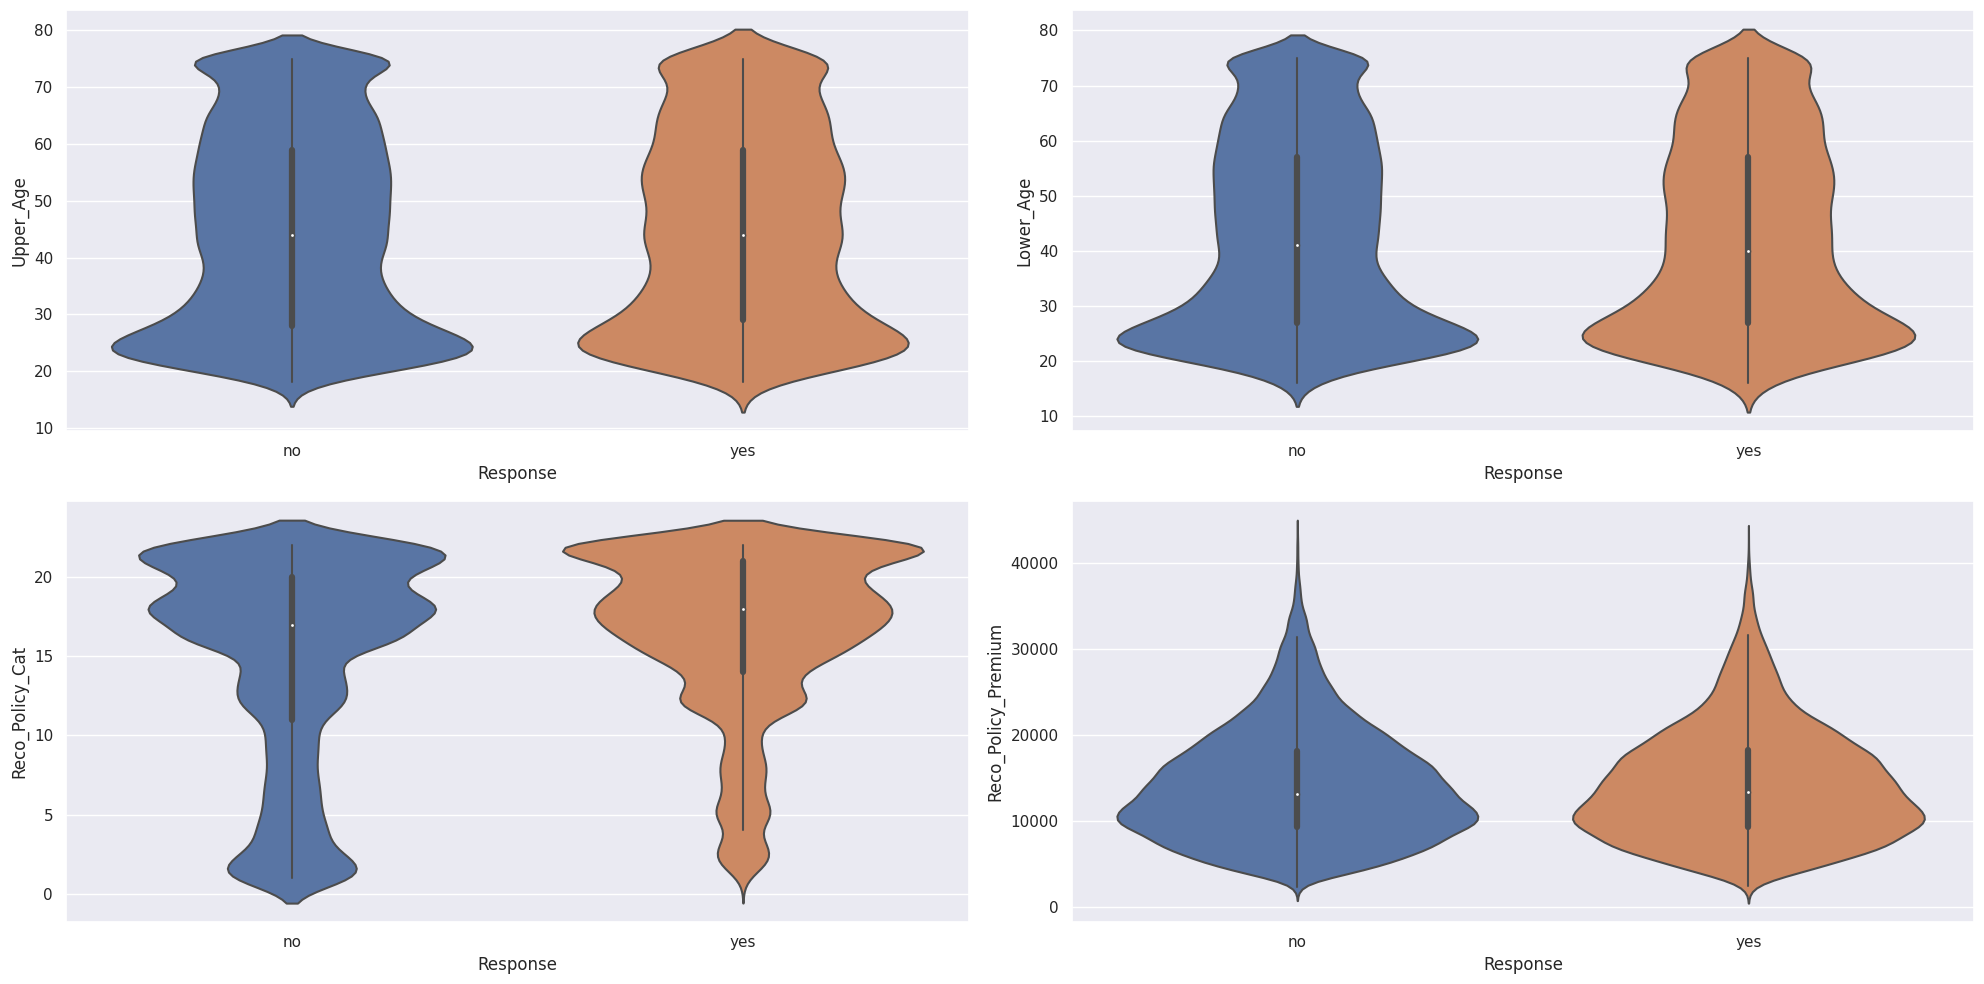

In [12]:
num_vars = ['Upper_Age','Lower_Age','Reco_Policy_Cat', 'Reco_Policy_Premium']
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axs=axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(y=var, x='Response', data=df, ax =axs[i])
fig.tight_layout()

plt.show()

<Axes: xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

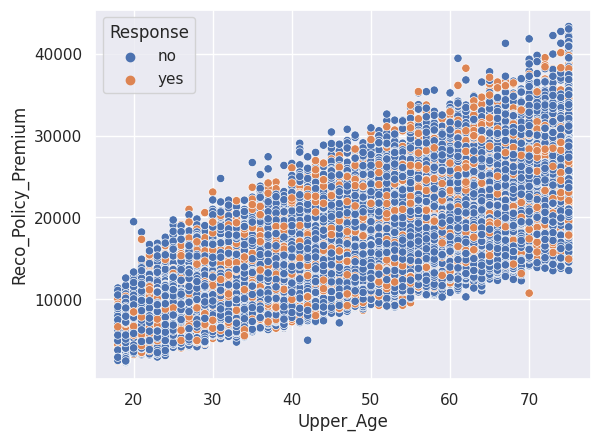

In [13]:
sns.scatterplot(x='Upper_Age',y='Reco_Policy_Premium',hue='Response',data=df)

<Axes: xlabel='Lower_Age', ylabel='Reco_Policy_Premium'>

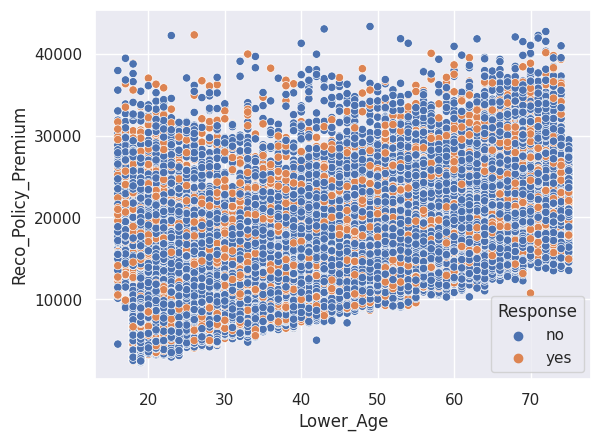

In [14]:
sns.scatterplot(x='Lower_Age',y='Reco_Policy_Premium',hue='Response',data=df)

# DATA PREPROCESSING 2



In [15]:
# CHECKING MISSING VALUES
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Health Indicator           22.976691
dtype: float64

In [ ]:
# drop null values each row that have null values
df.drop(columns = ['Holding_Policy_Duration','Holding_Policy_Type'],inplace=True)
df = df.dropna(subset=['Health Indicator'])
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36.0,36.0,No,X1,22.0,11628.0,no
1,2,C5,1117,Owned,Joint,75.0,22.0,No,X2,22.0,30510.0,no
3,4,C24,4378,Owned,Joint,52.0,48.0,No,X1,19.0,17780.0,no
4,5,C8,2190,Rented,Individual,44.0,44.0,No,X2,16.0,10404.0,no
5,6,C9,1785,Rented,Individual,52.0,52.0,No,X2,22.0,15264.0,yes


# Label encoding for each data types

In [16]:
# Loop over each columns in the data frame wher dtypes is object
for col in df.select_dtypes(include=['object']).columns:
  # print  the column name and the unique values
  print(f"{col}: {df[col].unique()}")

City_Code: ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Accomodation_Type: ['Rented' 'Owned']
Reco_Insurance_Type: ['Individual' 'Joint']
Is_Spouse: ['No' 'Yes']
Health Indicator: ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Holding_Policy_Duration: ['14+' nan '1' '3' '5' '9' '14' '7' '2' '11' '10' '8' '6' '4' '13' '12']
Response: ['no' 'yes']


In [17]:
from sklearn import preprocessing

# Loop over each column in thee data frame where dtype is "object"
for col in df.select_dtypes(include=['object']).columns:
  # intialize label encoder of object
  label_encoder = preprocessing.LabelEncoder()
  # fit the encoder to the unique values in the column
  label_encoder.fit(df[col].unique())
  # Transform  the columns using encoder
  df[col] = label_encoder.transform(df[col])

  #print the coloumn name and unique encoded values
  print(f"{col}: {df[col].unique()}")




City_Code: [22 31 16 34 35  0  6 20 19 33 12 17 30 11 27  1  8  9  7 21 26 18 10 32
  3  4  2  5 14 15 13 29 25 23 28 24]
Accomodation_Type: [1 0]
Reco_Insurance_Type: [0 1]
Is_Spouse: [0 1]
Health Indicator: [0 1 9 3 2 5 4 7 6 8]
Holding_Policy_Duration: [ 6 15  0  8 10 14  5 12  7  2  1 13 11  9  4  3]
Response: [0 1]


<Axes: >

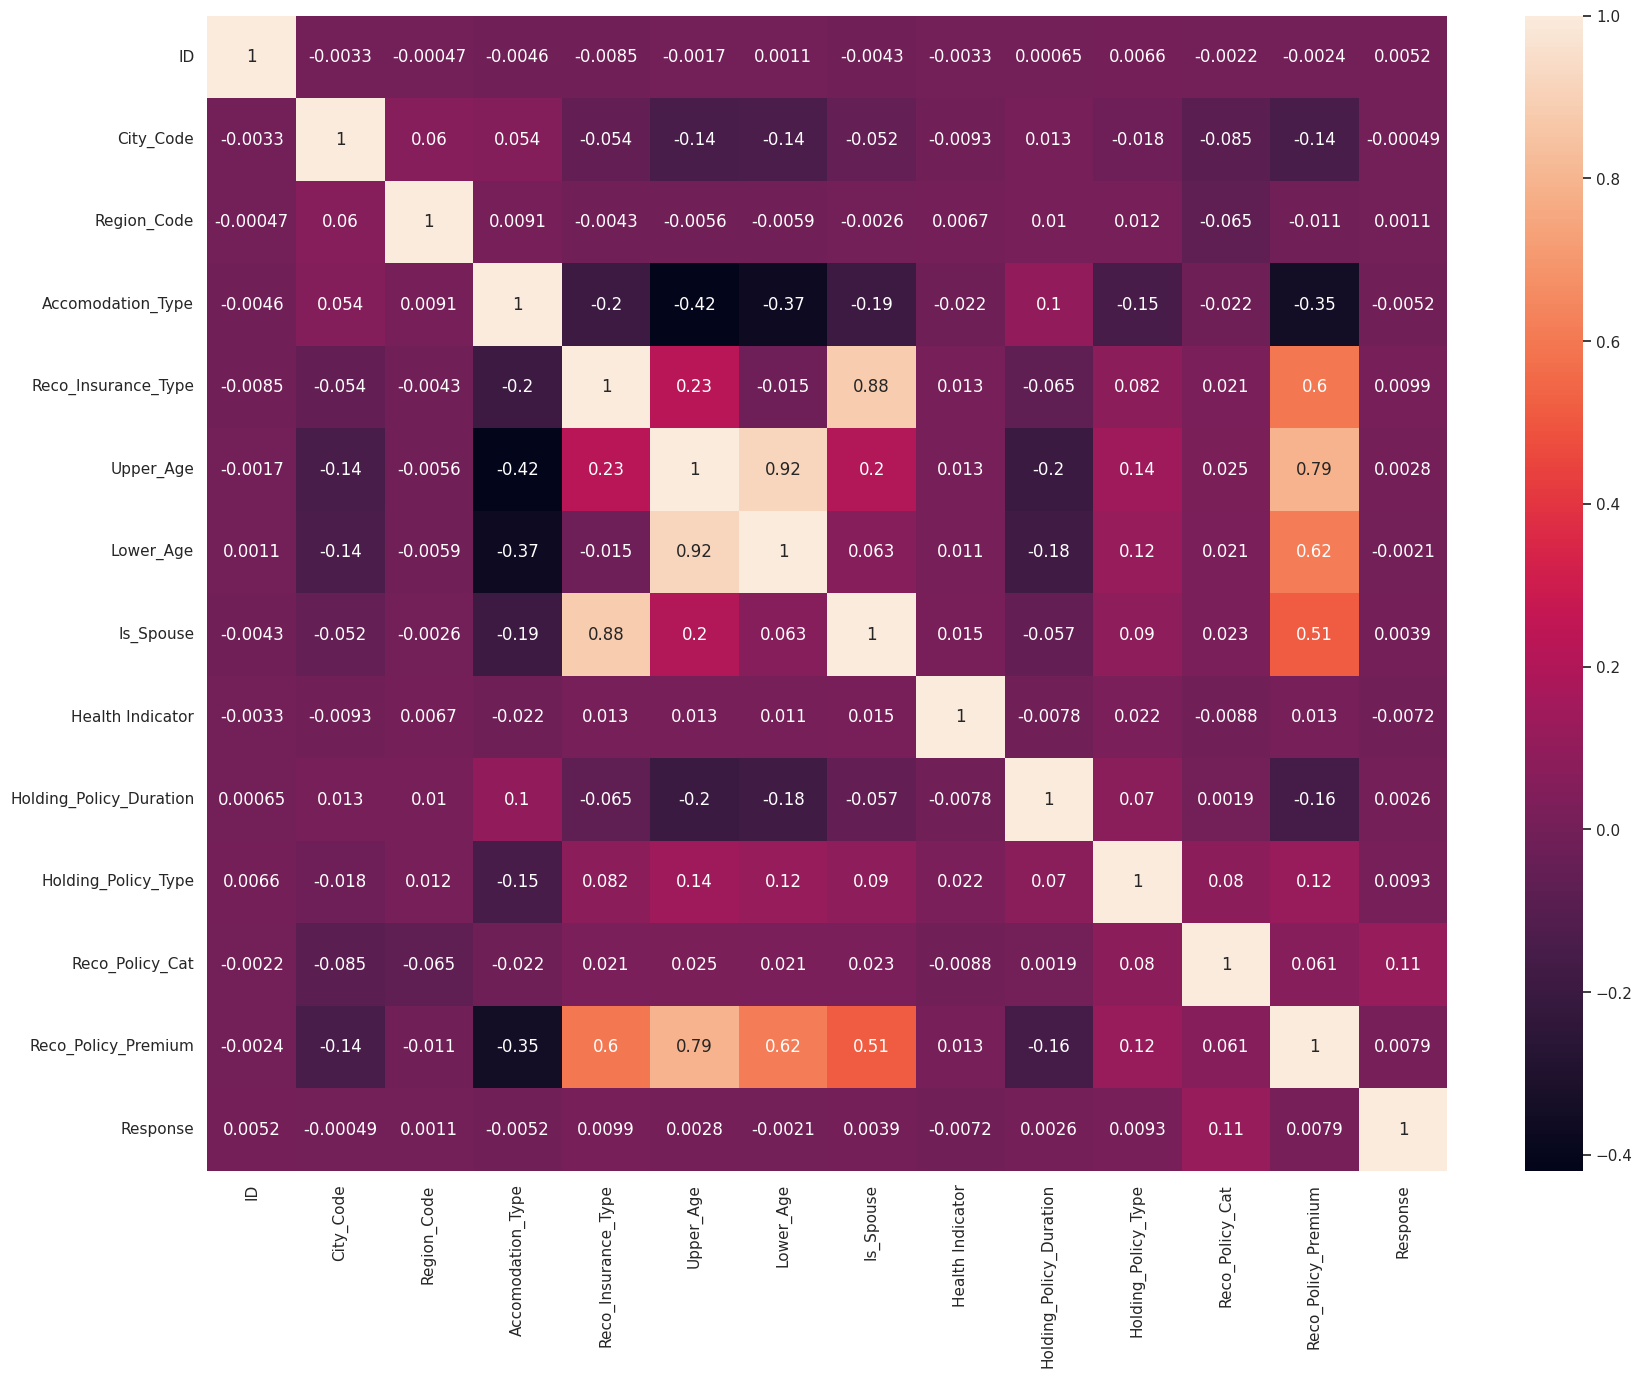

In [18]:
# CORELATION HEATMAP (PRINT CORRELATION SCORE EACH VARIABLE)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), fmt='.2g' , annot=True)


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
# select the feature(X) and the target variable(y)
x = df.drop('Response',axis=1)
y = df['Response']

In [20]:
# SPLITING THE DATA INTO TRAINING SETS AND TEST SETS
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
# remove outliers
from scipy import stats
# define column which  outliers can be removed
selected_columns = ['Reco_Policy_Premium']
# calculate the z-score for selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# set threselod value for outlier detection
threshold=3

outlier_indices = np.where(z_scores > threshold)[0]

# remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state':[0,42]
}

# perform a grid search with cross validation to find best hyperparameter
grid_search = GridSearchCV(dtree,param_grid, cv=5)
grid_search.fit(x_train,y_train)

# print the best hyper parameters
print(grid_search.best_params_)


ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=0, max_depth=8,min_samples_leaf=1,min_samples_split=3)
dtree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=8, min_samples_split=3, random_state=0)

In [27]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(x_test)
print("Accuracy Score:" , round(accuracy_score(y_test,y_pred)* 100, 2),"%")

NotFittedError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
print("f-1 Score :",(f1_score(y_test,y_pred,average='micro')))
print("precision_score :",(precision_score(y_test,y_pred, average='micro')))
print("recall_score:",(recall_score(y_test,y_pred, average='micro')))
print('Jacard Score :' , (jaccard_score(y_test,y_pred,average='micro')))
print('Log Loss: ',(log_loss(y_test,y_pred)))

f-1 Score : 0.7574945783901008
precision_score : 0.7574945783901008
recall_score: 0.7574945783901008
Jacard Score : 0.6096509240246406
Log Loss:  8.740781361488928


In [ ]:
imp_df = pd.DataFrame({
    'Feature Name ':x_train.columns
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="importance",ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x ="importance",y="Feature Name")

SyntaxError: ignored